# Perceptrón Multicapas #

## Datos ##

A continuación generaremos la muestra que nos servirá para entrenar y validar el perceptrón multicapa que construiremos. Generaremos 100 puntos en $\mathbb{R}^2$ que corresponderán a dos clases, la clase positiva y la negativa. 

Un punto $(X_1,X_2)\in\mathbb{R}^2$ pertenecerá a la clase positiva si $(X_1,X_2)$ se encuentra en el conjunto $\mathcal{R}$ definido como 
\begin{equation*}
    \mathcal{R}=\{(x_1,x_2)\in\mathbb{R}^2\ |\ 2\leq x_1\leq 8\text{ y } 2\leq x_2\leq 6\},
\end{equation*}
de lo contrario $(X_1,X_2)$ pertenecerá a la clase negativa.

Por lo tanto, la muestra que utilizaremos para entrenar y validar el perceptrón será
\begin{equation*}
    D=\{(X_{1i},X_{2i},Y_i)\in\mathbb{R}^3\ |\ \text{ con }Y_i=\mathbf{1}_{\mathcal{R}}(X_{1i},X_{2i})\text{ y }i=1,2,\dots,100\},
\end{equation*}

donde $\mathbf{1}_{\mathcal{R}}$ es la función indicadora del conjunto $\mathcal{R}$.

Sean $\mathcal{P},\mathcal{N}\subset D$ los subconjuntos que corresponden a la clase positiva y negativa respectivamente. De manera similar, consideremos los subconjuntos $E,V\subset D$ los conjuntos de entrenamiento y validación.

La muestra $D$ cumplirá las siguientes propiedades.

1. $(2,6),(8,6),(8,2),(2,2)\in E\subset D$, es decir, los vértices del rectángulo $\mathcal{R}$ forman parte del conjunto de entrenamiento y la clase positiva.
2. $|\mathcal{P}|=|\mathcal{N}|=50$.
3. $|E|=0.7 |D|$,  $|V|=0.3 |D|$ y $E,V$ forman una partición de $D$, es decir, $D=E\cup V$ y $E\cap V=\emptyset$.



A continuación generamos el conjunto $D$ con las propiedades anteriores.

In [1]:
import numpy as np 

FAR_BORDER=0.2
SEED=2
MAX_EPOCHS=1000


# Positive class
np.random.seed(SEED)
V=np.array([(2.0,2.0),(8.0,2.0),(8.0,6.0),(2.0,6.0)]) # Vertexes
Px,Py=np.random.uniform(2,8,size=46), np.random.uniform(2,6,size=46)
P_random=[(Px[i],Py[i]) for i in range(len(Px))]
P=np.concatenate((P_random,V))

# Negative class
C=(5,4) # Center of the Rectangle
height_C,width_C= 7.0,5.0
N=[]
'''First Quadrant'''
num_quadrant=0
while num_quadrant<13: 
    nx=np.random.uniform(C[0],C[0]+height_C,1)[0]
    ny=np.random.uniform(C[1],C[1]+width_C,1)[0]
    if nx>8 or ny>6:
        n=(nx+FAR_BORDER,ny+FAR_BORDER)
        N.append(n)
        num_quadrant+=1
'''Second Quadrant'''
num_quadrant=0
while num_quadrant<13: 
    nx=np.random.uniform(C[0],C[0]+height_C,1)[0]
    ny=np.random.uniform(C[1]-width_C,C[1],1)[0]
    if nx>8 or ny<2:
        n=(nx+FAR_BORDER,ny-FAR_BORDER)
        N.append(n)
        num_quadrant+=1
'''Third Quadrant'''
num_quadrant=0
while num_quadrant<12: 
    nx=np.random.uniform(C[0]-height_C,C[0],1)[0]
    ny=np.random.uniform(C[1]-width_C,C[1],1)[0]
    if nx<2 or ny<2:
        n=(nx-FAR_BORDER,ny-FAR_BORDER)
        N.append(n)
        num_quadrant+=1
'''Fourth Quadrant'''
num_quadrant=0
while num_quadrant<12: 
    nx=np.random.uniform(C[0]-height_C,C[0],1)[0]
    ny=np.random.uniform(C[1],C[1]+width_C,1)[0]
    if nx<2 or ny>6:
        n=(nx-FAR_BORDER,ny+FAR_BORDER)
        N.append(n)
        num_quadrant+=1  
N=np.asarray(N)      

Ahora visualizaremos los datos generados en la celda anterior. Marcamos la frontera del rectángulo $\mathcal{R}$ para identificar las regiones de decisión que queremos encontrar. 

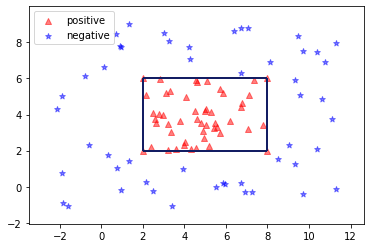

In [2]:
import matplotlib.pyplot as plt
from matplotlib import collections as mc 

rectangle_sides=[[(2,2),(8,2)],[(8,2),(8,6)],[(2,6),(8,6)],[(2,2),(2,6)]]
c=np.array(['#131D63', '#131D63', '#131D63', '#131D63'])

sides=mc.LineCollection(rectangle_sides,colors=c,linewidths=2)
fig, ax=plt.subplots()
ax.scatter(P[:,0],P[:,1],marker='^',alpha=0.5,c='r',label='positive')
ax.scatter(N[:,0],N[:,1],marker='*',alpha=0.5,c='b',label='negative')
ax.add_collection(sides)
ax.autoscale()
ax.margins(0.1)
ax.legend()

A continuación obtendremos los conjuntos $E$ y $D$, cuidando que los vértices del rectángulo anterior pertenezcan a $E$ y tanto $E$ como $D$ cumplan las propiedades que numeramos anteriormente.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Samples of positive and negative class of the form (X1,X2,Y)
P_random_class=np.column_stack([P_random,np.ones(len(P_random))])
N_class=np.column_stack([N,np.zeros(len(N[:,0]))])
df_P_random=pd.DataFrame(P_random_class,columns=['X1','X2','Y'])
df_N=pd.DataFrame(N_class,columns=['X1','X2','Y'])
# All sample with shuffle
df_Sample=pd.concat([df_P_random,df_N])
df_Sample=df_Sample.sample(frac=1,random_state=SEED)
# Get train and test sets
X_train, X_test,y_train, y_test=train_test_split(df_Sample[['X1','X2']].to_numpy(),df_Sample['Y'].to_numpy(),test_size=5/16,random_state=SEED)
# Add vertices
X_train=np.vstack([X_train,V])
y_train=np.append(y_train,np.ones(V.shape[0]))
# Save data
df_train=pd.DataFrame(np.column_stack([X_train,y_train]),columns=['X1','X2','Y'])
df_train=df_train.sample(frac=1,random_state=SEED)
df_train.to_csv('train.csv')
df_test=pd.DataFrame(np.column_stack([X_test,y_test]),columns=['X1','X2','Y'])
df_test.to_csv('test.csv')

## Método 1 ## 

A continuación realizaremos el entrenamiento y la validación del perceptrón multicapas para hacer la clasificación binaria del conjunto de datos anterior con nuestra propia implementación del algoritmo *backpropagation*. La implementación realizada se encuentra en el archivo *perceptron.py* en la clase *perceptron* (Ver códigos anexos a la tarea y README.md).

### Introducción ###

Como las muestras son de la forma $(X_{1i},X_{2i},Y_i)$ entonces tendremos dos neuronas en la capa de entrada y una en la capa de salida. 

La estructura sugerida para realizar la clasificación es utilizar un capa oculta con cuatro neuronas. Entonces tenemos 7 neuronas en total en el perceptrón que las etiquetaremos de la siguiente manera $n_0,n_1,\dots,n_6$. 

Sean $l_0,l_1,l_2$ las capas que tiene este perceptrón, $l_0$ es la capa de entrada, $l_1$ la capa oculta y $l_2$ la de salida. Enumeramos las neuronas de forma que 
\begin{align*}
    l_0=&\{n_0,n_1\}\\ 
    l_1=&\{n_2,n_3,n_4,n_5\}\\
    l_2=&\{n_6\}.
\end{align*}

Además, consideramos los pesos asociados a las conexiones de las neuronas como sigue 
\begin{equation*}
    w_{ij}\text{ es el peso asociado a la conexión de la neurona }n_i\text{ con la neurona }n_j.
\end{equation*}

Con esto en mente, los pesos de las conexiones entre $l_0$ y $l_1$ los codificamos en la siguiente matriz
\begin{equation*}W_{l_0l_1}=\begin{pmatrix}w_{02}&w_{03}&w_{04}&w_{05}\\ w_{12} & w_{13} & w_{14} & w_{15} \end{pmatrix}
\end{equation*}

De manera similar, los pesos de las conexiones entre $l_1$ y $l_2$ se codificarán así
$$W_{l_1l_2}=\begin{pmatrix}w_{26}\\ w_{36} \\ w_{46} \\ w_{56}\end{pmatrix}$$

Recordamos que el término *bias* solo existe para las neuronas de la capa escondida y de salida. Si $b_{i}$ el peso asociado al bias de la neurona $n_i$ entonces denotamos al vector que captura estos pesos de la siguiente forma
$$BIAS=(b_2,b_3,b_4,b_5,b_6)$$

### Resultados ###

En primer lugar, realizamos el entrenamiento del perceptrón propuesto. Utilizaremos el conjunto $E$ construido en la sección anterior. $E$ consta de $70$ observaciones e incluye los vértices del rectángulo $\mathcal{R}$.

In [4]:
import sys
sys.path.append('..')
from perceptron import perceptron
# Train data
data_train=pd.read_csv('train.csv')
X_train=data_train[['X1','X2']].to_numpy()
y_train=data_train['Y'].to_numpy()
layer_lenghts=[2,4,1]  # We proposed this structure in class
# Network training
network_method_1=perceptron(X_train,y_train,layer_lenghts,MAX_EPOCHS)
network_method_1.train()

Numero de iteraciones para el conjunto de entrenamiento: 343
MSE para el entrenamiento: 0.0499
Numero de muestras bien clasificadas (Entrenamiento): 67
Numero de muestras mal clasificadas  (Entrenamiento): 3
Numero de muestras en el conjunto de entrenamiento: 70
Precision del entrenamiento: 0.9571


El criterio de paro fue que el MSE fuera mayor a 0.05, o bien que el número de épocas fuera mayor a 1000.

Calculamos tanto el MSE como la precisión del modelo con el conjunto de validación $V$, obteniendo lo siguiente

In [5]:
data_test=pd.read_csv('test.csv')
X_test=data_test[['X1','X2']].to_numpy()
y_test=data_test.loc[:,'Y'].to_numpy()
network_method_1.test(X_test,y_test)

MSE para la validacion: 0.0685
Numero de muestras bien clasificadas (Validacion): 27
Numero de muestras mal clasificadas (Validacion): 3
Numero de muestras en el conjunto de validacion: 30
Precision en la validacion: 0.9000


Posteriormente, reportamos los parámetros y el tamaño del perceptrón. 

In [6]:
network_method_1.report_parameters()

Los pesos de la capa inicial a la capa oculta son:
[[ 2.03977342  2.69337469 -3.31474544  0.01984903]
 [ 0.97194516 -5.6928559  -1.50456415  1.1714856 ]]


Los pesos de la capa oculta a la capa de salida son:
[[ 5.14749429]
 [-4.42417026]
 [ 0.93947153]
 [-5.07569751]]


El coeficiente asociado al bias para cada neurona de la capa oculta es: 
[4.56981282 1.17506376 0.29703146 7.63657354]


El coeficiente asociado al bias para cada neurona de la capa de salida es: 
[2.34941783]


Numero de parametros contando el bias: 17


Observamos que tenemos una precisión aceptable tanto para el conjunto de entrenamiento $E$ como el de validación $V$ en $343$ épocas. En el entrenamiento el MSE si fue menor 0.05 esto no fue así con el conjunto $V$, aún así tenemos un buen resultado con una precisión de $95\%$ para el entrenamiento y de $90\%$ para la validación.

### Visualización ###

Cada neurona de la capa escondida y la de salida se puede ver como un función que va de $\mathbb{R}^2$ a $[0,1]$. Sea $f_i: \mathbb{R}^2\to [0,1]$ la función correspondiente a la neurona $n_i$.

Para visualizar el comportamiento de cada neurona graficaremos estas funciones. Obtenedremos una gráfica 3D por neurona, así también graficaremos los puntos $(X_{1i},X_{2i},\mathbf{1}_{\mathcal{R}}(X_{1i},X_{2i}))$

In [7]:
x1=np.linspace(-3,12,50)
x2=np.linspace(-3,12,50)
X1,X2=np.meshgrid(x1,x2,indexing='ij')

# Neuron functions
def f2(x):
    network_method_1.forward(x)
    return network_method_1.output[2]
def f3(x):
    network_method_1.forward(x)
    return network_method_1.output[3]
def f4(x):
    network_method_1.forward(x)
    return network_method_1.output[4]
def f5(x):
    network_method_1.forward(x)
    return network_method_1.output[5]
def f6(x):
    network_method_1.forward(x)
    return network_method_1.output[6]
# Output of functions  in the grid
Z2,Z3,Z4,Z5,Z6=[],[],[],[],[]
for i in range(len(x1)):
    for j in range(len(x2)):
        Z2.append(f2(np.array([X1[i,j],X2[i,j]])))
        Z3.append(f3(np.array([X1[i,j],X2[i,j]])))
        Z4.append(f4(np.array([X1[i,j],X2[i,j]])))
        Z5.append(f5(np.array([X1[i,j],X2[i,j]])))
        Z6.append(f6(np.array([X1[i,j],X2[i,j]])))
Z2=np.reshape(Z2,(len(x1),len(x2)))
Z3=np.reshape(Z3,(len(x1),len(x2)))
Z4=np.reshape(Z4,(len(x1),len(x2)))
Z5=np.reshape(Z5,(len(x1),len(x2)))
Z6=np.reshape(Z6,(len(x1),len(x2)))

A continuación visualizaremos la gráfica de las neuronas en la capa escondida, es decir, las neuronas $n_2,n_3,n_4$ y $n_5$.

La siguiente es la gráfica de la función $f_2$, podemos observar que la función $f_2$ solo pudo identificar una parte de la clase negativa. Como discutimos en clase el perceptrón de Rosenblat necesita que el conjunto sea linealmente separable, luego la frontera de la región de decisión de $n_2$ en el plano $(X_1,X_2)$ es una recta, en este caso correspondiente la recta que pasa por $(-2,0)$ y $(2,-3)$, aproximadamente.

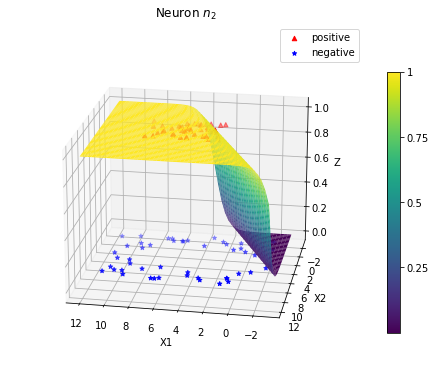

In [8]:
# Create figure 
fig = plt.figure(figsize=(8,8))

''' 
Plot Neuron N2
'''
ax_n2 = fig.add_subplot(111, projection='3d')
plot_n2_surface=ax_n2.plot_surface(X1,X2,Z2,cmap='viridis')
plot_positive=ax_n2.scatter3D(P[:,0],P[:,1],np.ones(len(P[:,0])),color='red',label='positive',marker='^')
plot_negative=ax_n2.scatter3D(N[:,0],N[:,1],np.zeros(len(N[:,0])),color='b',label='negative',marker='*')
ax_n2.view_init(elev=20, azim=100)
ax_n2.dist=11
ax_n2.legend()
ax_n2.set_title(r'Neuron $n_2$')
ax_n2.set_xlabel('X1')
ax_n2.set_ylabel('X2')
ax_n2.set_zlabel('Z')
# Add colorbar
cbar = fig.colorbar(plot_n2_surface,ax=ax_n2, shrink=0.6)
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels(['0', '0.25', '0.5', '0.75', '1'])


Hacemos lo propio con la neurona $n_3$. Aquí observamos que la región de decisión en el plano $(X_1,X_2)$ es aproximadamente la recta que pasa por $(1,0)$ y $(12,6)$.

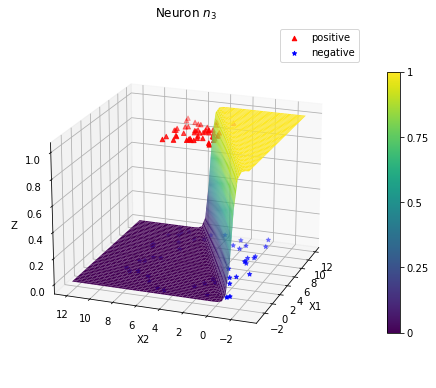

In [9]:
# Create figure 
fig = plt.figure(figsize=(8,8))

''' 
Plot Neuron n3
'''
ax_n3 = fig.add_subplot(111, projection='3d')
plot_n3_surface=ax_n3.plot_surface(X1,X2,Z3,cmap='viridis')
plot_positive=ax_n3.scatter3D(P[:,0],P[:,1],np.ones(len(P[:,0])),color='red',label='positive',marker='^')
plot_negative=ax_n3.scatter3D(N[:,0],N[:,1],np.zeros(len(N[:,0])),color='b',label='negative',marker='*')
ax_n3.view_init(elev=20, azim=200)
ax_n3.dist=11
ax_n3.legend()
ax_n3.set_title(r'Neuron $n_3$')
ax_n3.set_xlabel('X1')
ax_n3.set_ylabel('X2')
ax_n3.set_zlabel('Z')
# Add colorbar
cbar = fig.colorbar(plot_n3_surface,ax=ax_n3, shrink=0.6)
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels(['0', '0.25', '0.5', '0.75', '1'])


Ahora hacemos lo mismo con la gŕafica de $f_4$. En esta ocasión confunde por completo la clase postiva de la negativa, la recta correspondiente a la frontera de las regiones de decisión en el plano $(X_1,X_2)$ es aproximadamente la recta que pasa por $(6,-3)$ y $(2,6)$.

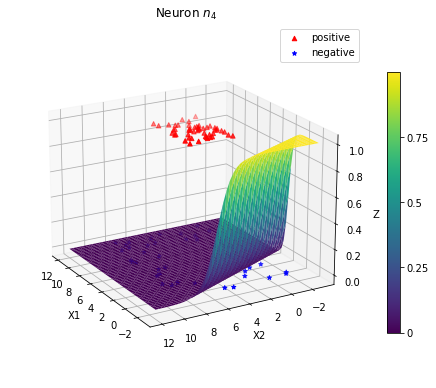

In [10]:
# Create figure 
fig = plt.figure(figsize=(8,8))

''' 
Plot Neuron n4
'''
ax_n4 = fig.add_subplot(111, projection='3d')
plot_n4_surface=ax_n4.plot_surface(X1,X2,Z4,cmap='viridis')
plot_positive=ax_n4.scatter3D(P[:,0],P[:,1],np.ones(len(P[:,0])),color='red',label='positive',marker='^')
plot_negative=ax_n4.scatter3D(N[:,0],N[:,1],np.zeros(len(N[:,0])),color='b',label='negative',marker='*')
ax_n4.view_init(elev=20, azim=150)
ax_n4.dist=11
ax_n4.legend()
ax_n4.set_title(r'Neuron $n_4$')
ax_n4.set_xlabel('X1')
ax_n4.set_ylabel('X2')
ax_n4.set_zlabel('Z')
# Add colorbar
cbar = fig.colorbar(plot_n4_surface,ax=ax_n4, shrink=0.6)
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels(['0', '0.25', '0.5', '0.75', '1'])


Finalmente, con la neurona $n_5$ tenemos que aquí la frontera de las regiones de decisión justo parece ser uno de los lados del rectángulo $\mathcal{R}$, el correspondiente a los vértices $(2,2)$ y $(8,2)$.

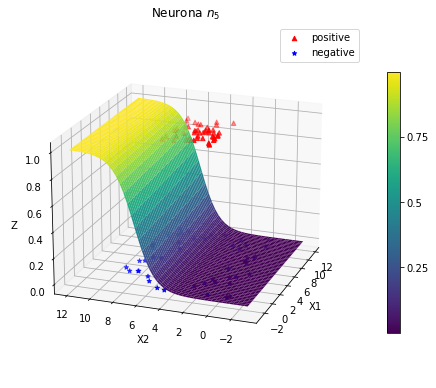

In [11]:
# Create figure 
fig = plt.figure(figsize=(8,8))

''' 
Plot Neuron n5
'''
ax_n5 = fig.add_subplot(111, projection='3d')
plot_n5_surface=ax_n5.plot_surface(X1,X2,Z5,cmap='viridis')
plot_positive=ax_n5.scatter3D(P[:,0],P[:,1],np.ones(len(P[:,0])),color='red',label='positive',marker='^')
plot_negative=ax_n5.scatter3D(N[:,0],N[:,1],np.zeros(len(N[:,0])),color='b',label='negative',marker='*')
ax_n5.view_init(elev=20, azim=200)
ax_n5.dist=11
ax_n5.legend()
ax_n5.set_title(r'Neurona $n_5$')
ax_n5.set_xlabel('X1')
ax_n5.set_ylabel('X2')
ax_n5.set_zlabel('Z')
# Add colorbar
cbar = fig.colorbar(plot_n5_surface,ax=ax_n5, shrink=0.6)
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels(['0', '0.25', '0.5', '0.75', '1'])


Finalmente veremos cual es la superficie asociada a la neurona $n_6$. Vemos que es la frontera de la región de decisión es el contorno de nivel de $0.5$ cuando la salida de la red no ve a la muestra con la misma probabilidad de ser negativo o positivo. y justo los valores cercanos a $1$ de $f_6$ coinciden con el interior del rectángulo.

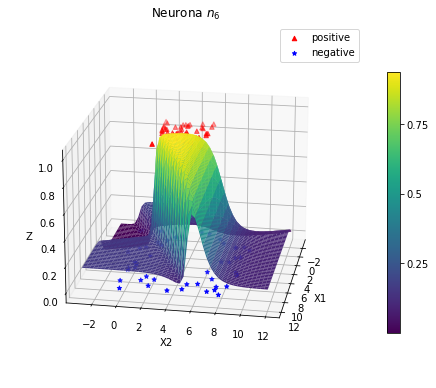

In [12]:
# Create figure 
fig = plt.figure(figsize=(8,8))

''' 
Plot Neuron n6
'''
ax_n6 = fig.add_subplot(111, projection='3d')
plot_n6_surface=ax_n6.plot_surface(X1,X2,Z6,cmap='viridis')
plot_positive=ax_n6.scatter3D(P[:,0],P[:,1],np.ones(len(P[:,0])),color='red',label='positive',marker='^')
plot_negative=ax_n6.scatter3D(N[:,0],N[:,1],np.zeros(len(N[:,0])),color='b',label='negative',marker='*')
ax_n6.view_init(elev=20, azim=10)
ax_n6.dist=11
ax_n6.legend()
ax_n6.set_title(r'Neurona $n_6$')
ax_n6.set_xlabel('X1')
ax_n6.set_ylabel('X2')
ax_n6.set_zlabel('Z')
# Add colorbar
cbar = fig.colorbar(plot_n6_surface,ax=ax_n6, shrink=0.6)
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels(['0', '0.25', '0.5', '0.75', '1'])


## Método 2 ##

Haremos lo mismo utilizando el perceptron multicapas de la librería *sklearn*.

En primer lugar realizamos el entrenamiento, considernado igual un factor de aprendizaje de $\eta=0.1$, la función de activación sigmoide y la misma estructura que en nuestra implementación del backpropagation, aunque aquí el tipo de gradiente es estocástico. 

Para obtener aproximadamente los mismos resultados utilizamos la función *MLPRegressor* de la librería *sklearn*, esto porque aquí se utiliza al MSE como función de pérdida al igual que nuestra propia implementación, además debemos considerar las mismas condiciones iniciales eso lo hacemos ajustando *warm_state=True* y luego modificando los parámetros de la red con las condiciones iniciales que obtuvimos a partir del Método $1$.

Cabe señalar que el término de *bias* en *MLPRegressor* se multiplica por $+1$ mientras que en la implementación vista en clase consideramos multiplicar por $-1$, por eso en el vector de *bias* del Método 2 es aproximadamente el negativo del vector *bias* del Método 1.

In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from perceptron import sigmoid

import warnings
warnings.filterwarnings("ignore")


# Define neural network
network_method_2=MLPRegressor(solver='sgd',activation='logistic',hidden_layer_sizes=(4,),learning_rate='constant',learning_rate_init=0.1,random_state=SEED,tol=1e-4,max_iter=MAX_EPOCHS,n_iter_no_change=100,shuffle=False,warm_start=True,alpha=0.0,momentum=0.0)

# Fit model
network_method_2.fit(X_train,y_train.astype(int))


network_method_2.coefs_[0]=network_method_1.initial_weights[np.ix_(network_method_1.index_l0,network_method_1.index_l1)]
network_method_2.coefs_[1]=network_method_1.initial_weights[np.ix_(network_method_1.index_l1,network_method_1.index_l2)]
network_method_2.intercepts_[0]=-network_method_1.initial_bias[network_method_1.index_l1]
network_method_2.intercepts_[1]=-network_method_1.initial_bias[network_method_1.index_l2]

# Train again with the same initial conditions of Method 1
network_method_2.fit(X_train,y_train)

# Measures Train Data
y_pred_train_prob=sigmoid(network_method_2.predict(X_train).reshape(X_train.shape[0]))
y_pred_train=np.array([1.0 if prob>=0.5 else 0.0 for prob in y_pred_train_prob])
train_accuracy_score=accuracy_score(y_train,y_pred_train)
train_accuracy=accuracy_score(y_train,y_pred_train,normalize=False)
train_MSE=mean_squared_error(y_train,y_pred_train_prob)

# Printing measures
print('Numero de iteraciones para el conjunto de entrenamiento: %d' %(network_method_2.n_iter_))
print('MSE para el entrenamiento: %.4f' %(train_MSE))
print('Numero de muestras bien clasificadas (entrenamiento): %d' %(train_accuracy))
print('Numero de muestras mal clasificadas (entrenamiento): %d' %(X_train.shape[0]-train_accuracy))
print('Numero de muestras en el conjunto de entrenamiento: %d' %(X_train.shape[0]))
print('Precision en la entrenamiento: %.4f' %(train_accuracy_score))



Numero de iteraciones para el conjunto de entrenamiento: 463
MSE para el entrenamiento: 0.0771
Numero de muestras bien clasificadas (entrenamiento): 63
Numero de muestras mal clasificadas (entrenamiento): 7
Numero de muestras en el conjunto de entrenamiento: 70
Precision en la entrenamiento: 0.9000


De igual manera, calculamos tanto la precisión como el MSE del conjunto de validación.

In [14]:
# Measure Test Data
y_pred_test_prob=sigmoid(network_method_2._predict(X_test).reshape(X_test.shape[0]))
y_pred_test=np.array([1.0 if prob>=0.5 else 0.0 for prob in y_pred_test_prob])
test_accuracy_score=accuracy_score(y_test,y_pred_test)
test_accuracy=accuracy_score(y_test,y_pred_test,normalize=False)
test_MSE=mean_squared_error(y_test,y_pred_test_prob)

# Printing measures
print('MSE para la validacion: %.4f' %(test_MSE))
print('Numero de muestras bien clasificadas (validacion): %d' %(test_accuracy))
print('Numero de muestras mal clasificadas (validacion): %d' %(X_test.shape[0]-test_accuracy))
print('Numero de muestras en el conjunto de validacion: %d' %(X_test.shape[0]))
print('Precision en la validacion: %.4f' %(test_accuracy_score))

MSE para la validacion: 0.1081
Numero de muestras bien clasificadas (validacion): 25
Numero de muestras mal clasificadas (validacion): 5
Numero de muestras en el conjunto de validacion: 30
Precision en la validacion: 0.8333


Finalmente reportamos los parámetros que se obtienen con esta librería y la complejidad del perceptrón multicapas.

In [15]:
print('Los pesos de la capa inicial a la capa oculta son:')
print(network_method_2.coefs_[0])
print('\n')
print('Los pesos de la capa oculta a la capa de salida son:')
print(network_method_2.coefs_[1])
print('\n')
print('El coeficiente asociado al bias para cada neurona de la capa oculta es: ')
print(network_method_2.intercepts_[0])
print('\n')
print('El coeficiente asociado al bias para cada neurona de la capa de salida es: ')
print(network_method_2.intercepts_[1])
print('\n')
print('Numero de parametros contando el bias: %d' %(network_method_1.num_parameters))
print('\n')
print('Numero de capas: %d' %(network_method_2.n_layers_))

Los pesos de la capa inicial a la capa oculta son:
[[ 2.04205389e+00  2.72524293e+00 -3.31726946e+00 -4.59568867e-03]
 [ 9.93870433e-01 -5.67495947e+00 -1.49872621e+00  1.04858521e+00]]


Los pesos de la capa oculta a la capa de salida son:
[[ 5.15590786]
 [-4.38901865]
 [ 0.9534802 ]
 [-5.04814739]]


El coeficiente asociado al bias para cada neurona de la capa oculta es: 
[-4.56187236 -1.18070359 -0.29569413 -7.6493035 ]


El coeficiente asociado al bias para cada neurona de la capa de salida es: 
[-2.31609806]


Numero de parametros contando el bias: 17


Numero de capas: 3


Con esta paquetería lo que intentamos fue reproducir de la manera más aproximada el backpropagation que programamos por nuestra cuenta para validar los resultados de nuestra implementación. Pude notar que otras herramientas como *Tensorflow* y *Pytorch* e incluso la función *MLPClassifier* de *scikitlearn* no utilizan el MSE y utilizan otras formas de optimización de la función de pérdida, por lo que los resultados con estas herramientas no son comparables con nuestra implementación. 

Con este método los resultados fueron similares al Método 1 pero lo hizo en $463$ épocas, el MSE fue mayor tanto en la validación como en el entrenamiento, respectivamente aunque la precisión es aceptable teniendo $90\%$ en el entrenamiento y $83\%$ en la validación.

### Visualización ###

A continuación visualizaremos lo que hace cada neurona graficando las funciones $f_2,f_3,f_4,f_5$ correspondientes a las neuronas de la capa escondida y $f_6$ asociada a la neurona de salida.

In [16]:
# Output of functions  in the grid

# Use de weights of the method 2
network_method_1.weights[np.ix_(network_method_1.index_l0,network_method_1.index_l1)]=network_method_2.coefs_[0]
network_method_1.weights[np.ix_(network_method_1.index_l1,network_method_1.index_l2)]=network_method_2.coefs_[1]
network_method_1.bias[np.ix_(network_method_1.index_l1)]=-network_method_2.intercepts_[0]
network_method_1.bias[np.ix_(network_method_1.index_l2)]=-network_method_2.intercepts_[1]

# Get the values of functions
Z2,Z3,Z4,Z5,Z6=[],[],[],[],[]
for i in range(len(x1)):
    for j in range(len(x2)):
        Z2.append(f2(np.array([X1[i,j],X2[i,j]])))
        Z3.append(f3(np.array([X1[i,j],X2[i,j]])))
        Z4.append(f4(np.array([X1[i,j],X2[i,j]])))
        Z5.append(f5(np.array([X1[i,j],X2[i,j]])))
        Z6.append(f6(np.array([X1[i,j],X2[i,j]])))
Z2=np.reshape(Z2,(len(x1),len(x2)))
Z3=np.reshape(Z3,(len(x1),len(x2)))
Z4=np.reshape(Z4,(len(x1),len(x2)))
Z5=np.reshape(Z5,(len(x1),len(x2)))
Z6=np.reshape(Z6,(len(x1),len(x2)))

Con los pesos calculados con la librería, la gráfica de $f_2$ es la siguiente, un resultado similar al método 1.

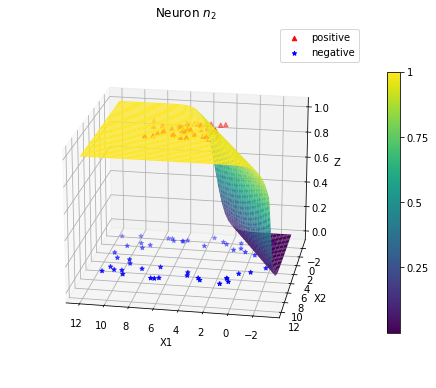

In [17]:
# Create figure 
fig = plt.figure(figsize=(8,8))

''' 
Plot Neuron N2
'''
ax_n2 = fig.add_subplot(111, projection='3d')
plot_n2_surface=ax_n2.plot_surface(X1,X2,Z2,cmap='viridis')
plot_positive=ax_n2.scatter3D(P[:,0],P[:,1],np.ones(len(P[:,0])),color='red',label='positive',marker='^')
plot_negative=ax_n2.scatter3D(N[:,0],N[:,1],np.zeros(len(N[:,0])),color='b',label='negative',marker='*')
ax_n2.view_init(elev=20, azim=100)
ax_n2.dist=11
ax_n2.legend()
ax_n2.set_title(r'Neuron $n_2$')
ax_n2.set_xlabel('X1')
ax_n2.set_ylabel('X2')
ax_n2.set_zlabel('Z')
# Add colorbar
cbar = fig.colorbar(plot_n2_surface,ax=ax_n2, shrink=0.6)
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels(['0', '0.25', '0.5', '0.75', '1'])


Para la neurona $n_3$ tenemos la siguiente visualización, muy similar también a la superficie de esa neurona en el método 1.

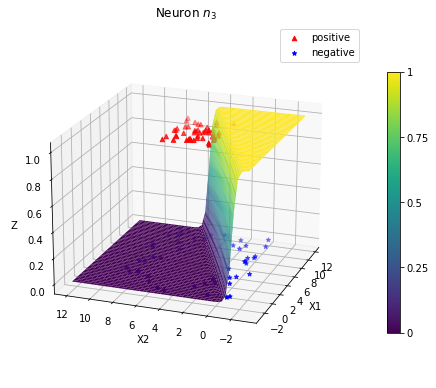

In [18]:
# Create figure 
fig = plt.figure(figsize=(8,8))

''' 
Plot Neuron n3
'''
ax_n3 = fig.add_subplot(111, projection='3d')
plot_n3_surface=ax_n3.plot_surface(X1,X2,Z3,cmap='viridis')
plot_positive=ax_n3.scatter3D(P[:,0],P[:,1],np.ones(len(P[:,0])),color='red',label='positive',marker='^')
plot_negative=ax_n3.scatter3D(N[:,0],N[:,1],np.zeros(len(N[:,0])),color='b',label='negative',marker='*')
ax_n3.view_init(elev=20, azim=200)
ax_n3.dist=11
ax_n3.legend()
ax_n3.set_title(r'Neuron $n_3$')
ax_n3.set_xlabel('X1')
ax_n3.set_ylabel('X2')
ax_n3.set_zlabel('Z')
# Add colorbar
cbar = fig.colorbar(plot_n3_surface,ax=ax_n3, shrink=0.6)
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels(['0', '0.25', '0.5', '0.75', '1'])

Ahora, para la neurona $n_4$, al igual que en el método 1 confunde por completo la clase positiva de la negativa, seguramente el peso asociado con esa neurona y la capa de salida será el más pequeño en valor absoluto, y de hecho en efecto lo es. 

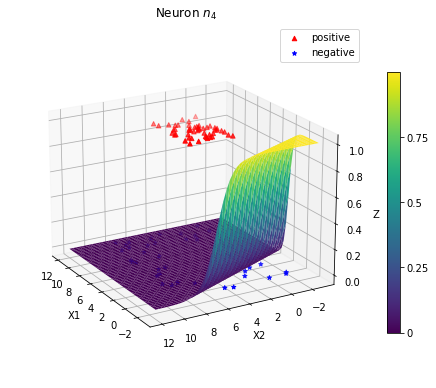

In [19]:
# Create figure 
fig = plt.figure(figsize=(8,8))

''' 
Plot Neuron n4
'''
ax_n4 = fig.add_subplot(111, projection='3d')
plot_n4_surface=ax_n4.plot_surface(X1,X2,Z4,cmap='viridis')
plot_positive=ax_n4.scatter3D(P[:,0],P[:,1],np.ones(len(P[:,0])),color='red',label='positive',marker='^')
plot_negative=ax_n4.scatter3D(N[:,0],N[:,1],np.zeros(len(N[:,0])),color='b',label='negative',marker='*')
ax_n4.view_init(elev=20, azim=150)
ax_n4.dist=11
ax_n4.legend()
ax_n4.set_title(r'Neuron $n_4$')
ax_n4.set_xlabel('X1')
ax_n4.set_ylabel('X2')
ax_n4.set_zlabel('Z')
# Add colorbar
cbar = fig.colorbar(plot_n4_surface,ax=ax_n4, shrink=0.6)
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels(['0', '0.25', '0.5', '0.75', '1'])

Para la última neurona de la capa oculta, la $n_5$ tenemos el siguiente gráfico. Esta se ve un poco más desplazada hacia la izquierda en comparación con la del método $1$ e igual parece estar la frontera de la región de decisión a uno de los lados del rectángulo, el correspondiente a  los vértices $(2,2)$ y $(8,2)$

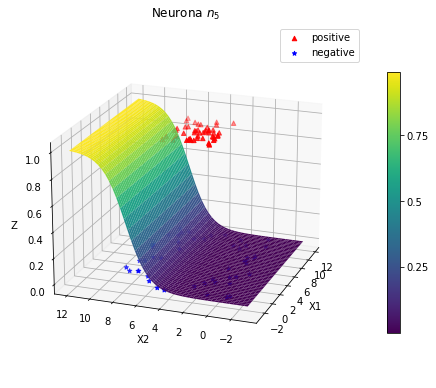

In [20]:
# Create figure 
fig = plt.figure(figsize=(8,8))

''' 
Plot Neuron n5
'''
ax_n5 = fig.add_subplot(111, projection='3d')
plot_n5_surface=ax_n5.plot_surface(X1,X2,Z5,cmap='viridis')
plot_positive=ax_n5.scatter3D(P[:,0],P[:,1],np.ones(len(P[:,0])),color='red',label='positive',marker='^')
plot_negative=ax_n5.scatter3D(N[:,0],N[:,1],np.zeros(len(N[:,0])),color='b',label='negative',marker='*')
ax_n5.view_init(elev=20, azim=200)
ax_n5.dist=11
ax_n5.legend()
ax_n5.set_title(r'Neurona $n_5$')
ax_n5.set_xlabel('X1')
ax_n5.set_ylabel('X2')
ax_n5.set_zlabel('Z')
# Add colorbar
cbar = fig.colorbar(plot_n5_surface,ax=ax_n5, shrink=0.6)
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels(['0', '0.25', '0.5', '0.75', '1'])


Finalmente, la superficie asociada a la neurona de la capa de salida $n_6$ es la siguiente. Comparando las superficies del método $1$ con esta que corresponde al método $2$ podemos ver que el tubo del método $1$ es más estrecho y concentrado en el centro del rectángulo que contiene los puntos de la clase positiva, mientras que el del método $2$ tiene un tubo más ancho y en consecuencia es mas susceptible a fallar en la clasificación pues estaría haciendo el contorno de nive $0.5$ más ancho de lo que realmente debe ser por eso visualmente hay menor precisión en el método $2$ que en el método $1$ al menos con la elección de los conjuntos $E$ y $V$ que tenemos. 

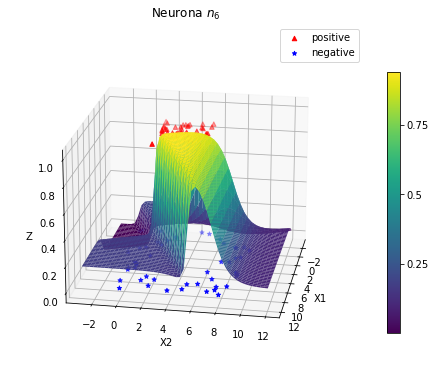

In [21]:
# Create figure 
fig = plt.figure(figsize=(8,8))

''' 
Plot Neuron n6
'''
ax_n6 = fig.add_subplot(111, projection='3d')
plot_n6_surface=ax_n6.plot_surface(X1,X2,Z6,cmap='viridis')
plot_positive=ax_n6.scatter3D(P[:,0],P[:,1],np.ones(len(P[:,0])),color='red',label='positive',marker='^')
plot_negative=ax_n6.scatter3D(N[:,0],N[:,1],np.zeros(len(N[:,0])),color='b',label='negative',marker='*')
ax_n6.view_init(elev=20, azim=10)
ax_n6.dist=11
ax_n6.legend()
ax_n6.set_title(r'Neurona $n_6$')
ax_n6.set_xlabel('X1')
ax_n6.set_ylabel('X2')
ax_n6.set_zlabel('Z')
# Add colorbar
cbar = fig.colorbar(plot_n6_surface,ax=ax_n6, shrink=0.6)
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels(['0', '0.25', '0.5', '0.75', '1'])